# Hướng dẫn đọc Sơ đồ Mạch Lượng tử (Quantum Circuit)

## 📚 Kiến thức cơ bản

### 1. **Cấu trúc của sơ đồ**
```
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0
```

### 2. **Các thành phần chính**

- **`q:`** = Dòng Qubit (đơn vị tính toán lượng tử)
  - Đọc từ **trái sang phải** theo thời gian
  - Qubit bắt đầu ở trạng thái |0⟩
  
- **`c: 1/`** = Dòng Bit cổ điển (lưu kết quả đo)
  - Số `1` = có 1 bit cổ điển
  - Đường đôi `══` = kênh cổ điển
  
- **Hộp vuông `┌───┐`** = Cổng lượng tử (quantum gate)
  - Thay đổi trạng thái của qubit
  
- **`M` trong hộp** = Phép đo lường (Measurement)
  - Chuyển trạng thái lượng tử thành bit cổ điển 0 hoặc 1
  
- **Đường dọc `╥` và `╩`** = Kết nối giữa qubit và bit cổ điển
  - Chỉ nơi lưu kết quả đo

### 3. **Các cổng thường gặp**

| Ký hiệu | Tên | Chức năng |
|---------|-----|-----------|
| `H` | Hadamard | Tạo trạng thái chồng chập (superposition) |
| `X` | NOT/Pauli-X | Đảo bit: \|0⟩ ↔ \|1⟩ |
| `Y` | Pauli-Y | Quay quanh trục Y |
| `Z` | Pauli-Z | Đảo pha |
| `CNOT` | Controlled-NOT | Cổng 2 qubit có điều kiện |
| `M` | Measure | Đo lường qubit |

### 4. **Cách đọc sơ đồ**

1. Bắt đầu từ **bên trái** (trạng thái khởi tạo)
2. Đi **sang phải** theo thứ tự các cổng
3. Mỗi cổng biến đổi trạng thái qubit
4. Kết thúc với phép đo `M` (nếu có)

---

**Ví dụ dưới đây sẽ minh họa các khái niệm này!**

Sơ đồ mạch lượng tử:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Kết quả sau 1024 lần chạy: {'1': 504, '0': 520}


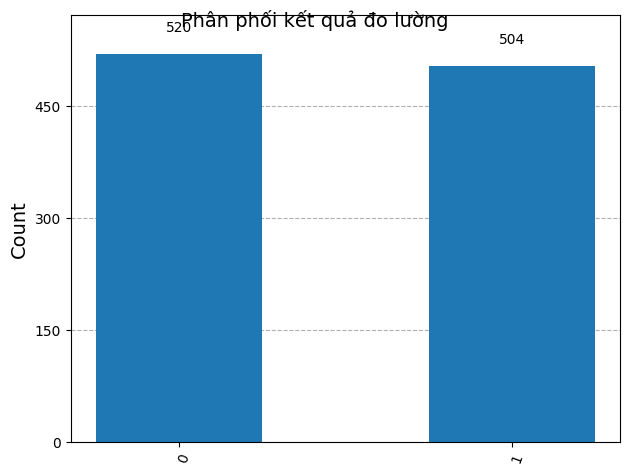

In [3]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Cấu hình matplotlib cho notebook
%matplotlib inline

# 1. Tạo Mạch Lượng tử (1 qubit, 1 bit cổ điển)
qc = QuantumCircuit(1, 1)

# 2. Áp dụng Cổng H (Hadamard)
qc.h(0)

# 3. Đo lường Qubit 0 và lưu vào Bit cổ điển 0
qc.measure(0, 0)

# Vẽ sơ đồ mạch lượng tử
print("Sơ đồ mạch lượng tử:")
print(qc.draw(output='text'))

# 4. Mô phỏng và chạy mạch
sampler = StatevectorSampler()
job = sampler.run([qc], shots=1024)
result = job.result()

# 5. Xem kết quả (Bạn sẽ thấy '0' và '1' gần bằng nhau)
counts = result[0].data.c.get_counts()
print("\nKết quả sau 1024 lần chạy:", counts)

# Vẽ biểu đồ kết quả
fig = plot_histogram(counts)
fig.suptitle('Phân phối kết quả đo lường', fontsize=14)
plt.show()

## 🔍 Phân tích sơ đồ trên

Sơ đồ bạn vừa thấy:
```
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0
```

**Giải thích từng bước:**

1. **Bước 1: Khởi tạo**
   - Qubit `q` bắt đầu ở trạng thái |0⟩
   - Bit cổ điển `c` chưa có giá trị

2. **Bước 2: Cổng H (Hadamard)**
   - Qubit đi qua cổng `H`
   - Trạng thái thay đổi: |0⟩ → (|0⟩ + |1⟩)/√2
   - Qubit giờ ở **trạng thái chồng chập** (50% là 0, 50% là 1)

3. **Bước 3: Đo lường M**
   - Đo qubit và "sụp đổ" trạng thái chồng chập
   - Kết quả: ngẫu nhiên 0 hoặc 1
   - Lưu vào bit cổ điển `c[0]`

4. **Kết quả cuối cùng:**
   - Chạy 1024 lần → thu được ~512 lần '0' và ~512 lần '1'
   - Chứng minh trạng thái chồng chập hoạt động!

---

### 💡 Mẹo học Qiskit:
- Bắt đầu với mạch đơn giản (1-2 qubit)
- Vẽ sơ đồ bằng `qc.draw()` sau mỗi thay đổi
- Thực hành đọc từ trái sang phải
- Học dần các cổng phổ biến (H, X, CNOT, ...)